In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from cycler import cycler
import option_payoffs as op
import importlib
importlib.reload(op)

<module 'option_payoffs' from '/Users/kevinpark/Desktop/git/Derivatives/option_payoffs.py'>

In [48]:
# Current Spot Price
data_points = 200
S = np.arange(0, data_points+1, 5)
payoff_df = pd.DataFrame(index = S)
payoff_df.index.name = 'Spot'


### Inputs
# Risk-free rate
R_f = 0.04

# option premium
option_premium = 0

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price, N)
payoff_df['Long_Stock'] = Long_Stock_payoff

Short_Stock_payoff, Short_Stock_BEP = op.Short_Stock(S, buy_price, N)
payoff_df['Short_Stock'] = Short_Stock_payoff

Long_ZCB_payoff = op.Long_ZCB(S, X)
payoff_df['Long_ZCB'] = Long_ZCB_payoff

Short_ZCB_payoff = op.Short_ZCB(S, X)
payoff_df['Short_ZCB'] = Short_ZCB_payoff

Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call'] = Long_Call_payoff

Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call'] = Short_Call_payoff

Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put'] = Long_Put_payoff

Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put'] = Short_Put_payoff

### BSM Inputs
# Excercise Price
X = 100
# continuously compounded Risk-free rate (annualized), assumed 4% 
r = 0.04
# Expected Volatility of spot asset returns until expiration date (annualized), assumed 20% 
stdev = 0.2
# (T - t)/T = 0.75 (9 months remaining to expiration date), remaining time to expiration in years 
T = 0.75

# Generate BSM option premium valuations prior to Maturity
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
# BSM Calls Option
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Call_BSM'] = BSM_Call_payoff
# BSM Put Option
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Put_BSM'] = BSM_Put_payoff
# BSM Long ZCB
payoff_df['Long_ZCB_BSM'] = X * np.exp(-r * T)

# Covered Stock

### Covered Call: S -C = -P

Long_Stock BEP: S = 100
Short_Call BEP: S = 120
Synthetic Position BEP: S = 80


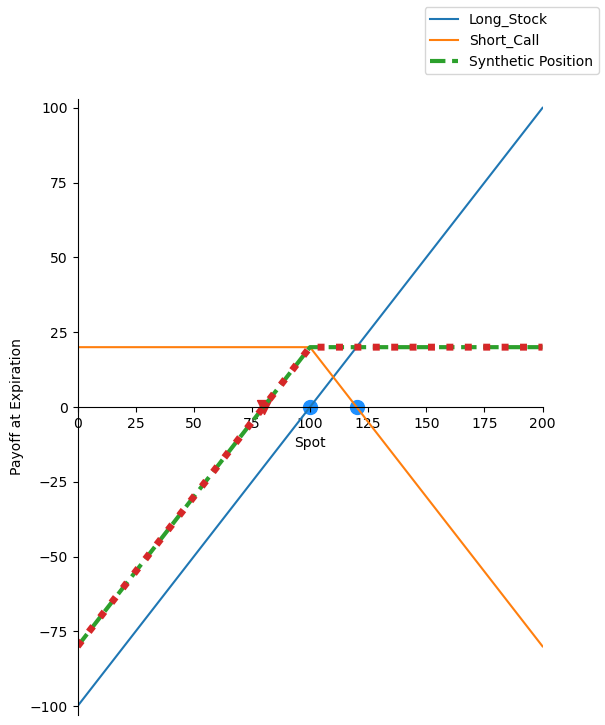

In [49]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price, N)
payoff_df['Long_Stock'] = Long_Stock_payoff

Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call'] = Short_Call_payoff

selected_positions = ['Long_Stock', 'Short_Call']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent Position
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put'] = Short_Put_payoff
payoff_df['Short_Put'].plot(linewidth=5, linestyle=':', label='Short_Put');

### Covered Put: -S -P = -C

Short_Stock BEP: S = 100
Short_Put BEP: S = 80
Synthetic Position BEP: S = 120


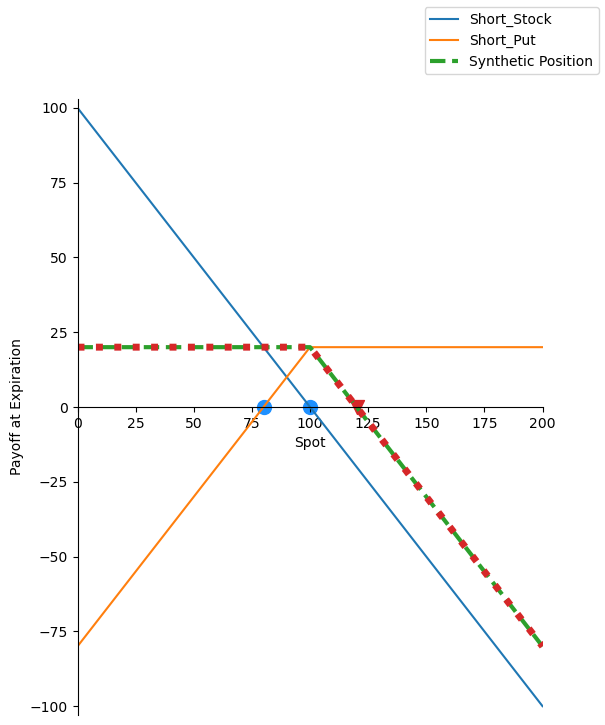

In [50]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Short_Stock_payoff, Short_Stock_BEP = op.Short_Stock(S, buy_price, N)
payoff_df['Short_Stock'] = Short_Stock_payoff

Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put'] = Short_Put_payoff

selected_positions = ['Short_Stock', 'Short_Put']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent Position
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call'] = Short_Call_payoff
payoff_df['Short_Call'].plot(linewidth=5, linestyle=':', label='Short_Call');

### Protective Call: -S + C = P

Short_Stock BEP: S = 100
Long_Call BEP: S = 120
Synthetic Position BEP: S = 80


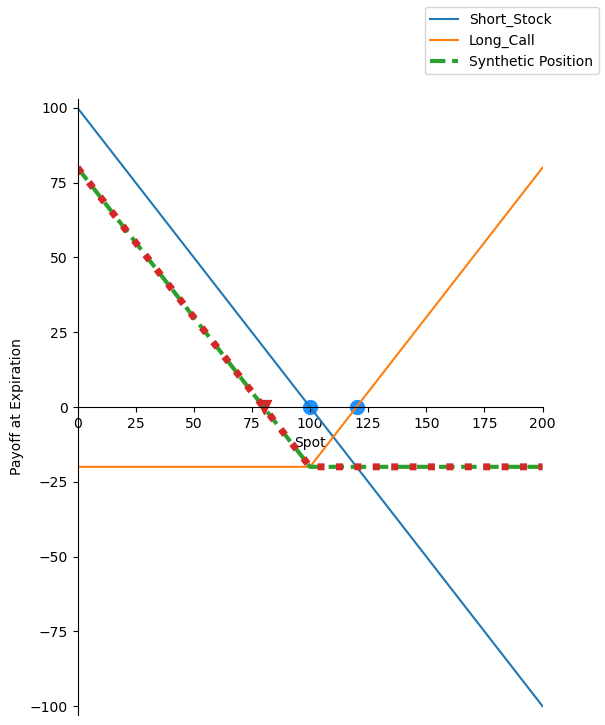

In [51]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Short_Stock_payoff, Short_Stock_BEP = op.Short_Stock(S, buy_price, N)
payoff_df['Short_Stock'] = Short_Stock_payoff

Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call'] = Long_Call_payoff

selected_positions = ['Short_Stock', 'Long_Call']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent Position
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put'] = Long_Put_payoff
payoff_df['Long_Put'].plot(linewidth=5, linestyle=':', label='Long_Put');

### Protective Put: S + P = C

Long_Stock BEP: S = 100
Long_Put BEP: S = 80
Synthetic Position BEP: S = 120


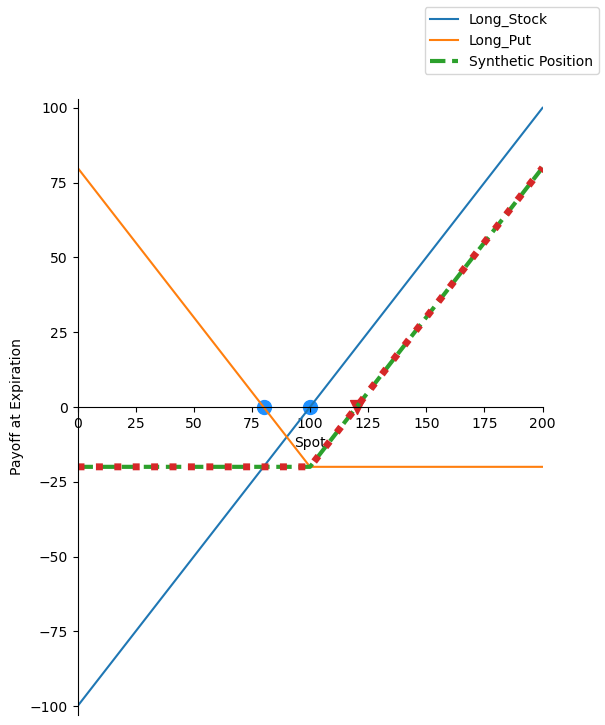

In [52]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price, N)
payoff_df['Long_Stock'] = Long_Stock_payoff

Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put'] = Long_Put_payoff

selected_positions = ['Long_Stock', 'Long_Put']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent Position
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call'] = Long_Call_payoff
payoff_df['Long_Call'].plot(linewidth=5, linestyle=':', label='Long_Call');

# Vertical Spread

### Bull Call Spread: C1 - C2 (Strike Price: X_C1 < X_C2, Option Premium: C1 paid > C2 received -> Debit spread)

Long_Call_lowerX BEP: S = 120
Short_Call_higherX BEP: S = 130
Synthetic Position BEP: S = 110


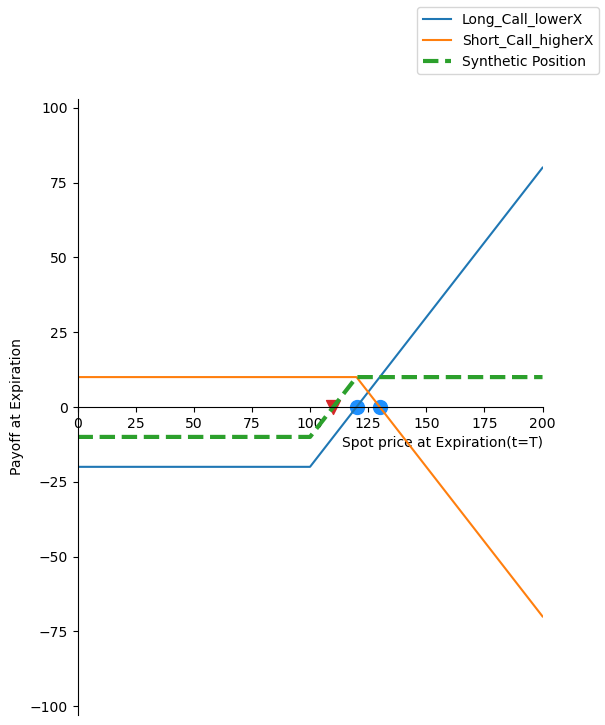

In [54]:
# option premium paid for Long Call
option_premium_1 = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium_1)
payoff_df['Long_Call_lowerX'] = Long_Call_payoff

# option premium received for Short Call
option_premium_2 = 10
X = 120
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium_2)
payoff_df['Short_Call_higherX'] = Short_Call_payoff

selected_positions = ['Long_Call_lowerX', 'Short_Call_higherX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Bull Put Spread: -P1 + P2 (Strike Price: X_P1 > X_P2, Option Premium: P1 received > P2 paid -> Credit spread)

Short_Put_higherX BEP: S = 100
Long_Put_lowerX BEP: S = 90
Synthetic Position BEP: S = 110


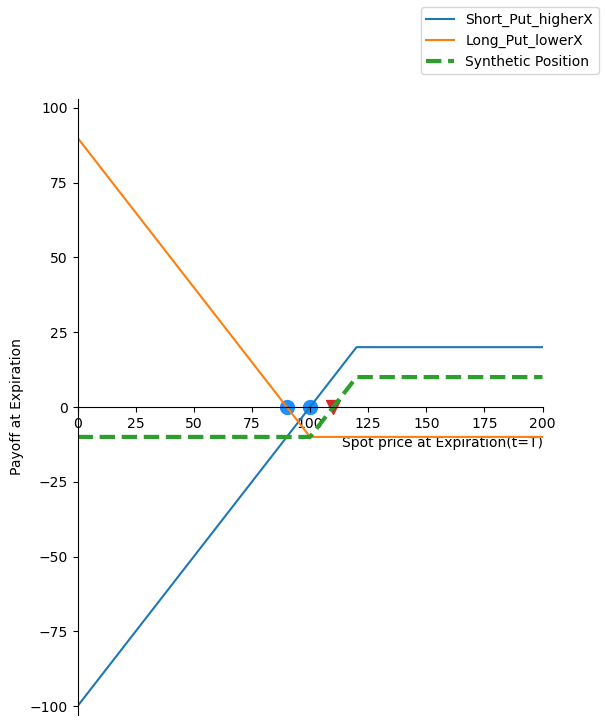

In [55]:
# option premium recieved for Short Put
option_premium_1 = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = 120

# Number of underlying assets held
N = 1


# Create Option Payoffs at Expiration (t = T)
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium_1)
payoff_df['Short_Put_higherX'] = Short_Put_payoff

# option premium paid for Long Put
option_premium_2 = 10
X = 100
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium_2)
payoff_df['Long_Put_lowerX'] = Long_Put_payoff

selected_positions = ['Short_Put_higherX', 'Long_Put_lowerX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Bear Call Spread: -C1 + C2 (Strike Price: X_C1 < X_C2, Option Premium: C1 recieved > C2 paid -> Credit spread)

Short_Call_lowerX BEP: S = 120
Long_Call_higherX BEP: S = 130
Synthetic Position BEP: S = 110


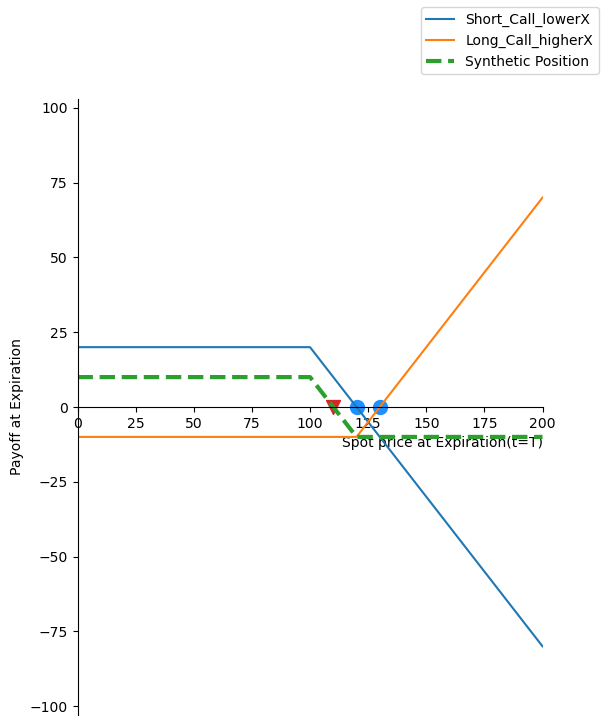

In [16]:
# option premium recieved for Short Call
option_premium_1 = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium_1)
payoff_df['Short_Call_lowerX'] = Short_Call_payoff

# option premium paid for Long Call
option_premium_2 = 10
X = 120
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium_2)
payoff_df['Long_Call_higherX'] = Long_Call_payoff

selected_positions = ['Short_Call_lowerX', 'Long_Call_higherX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Bear Put Spread: P1 - P2 (Strike Price: X_P1 > X_P2, Option Premium: P1 paid > P2 received -> Debit spread)

Long_Put_higherX BEP: S = 100
Short_Put_lowerX BEP: S = 90
Synthetic Position BEP: S = 110


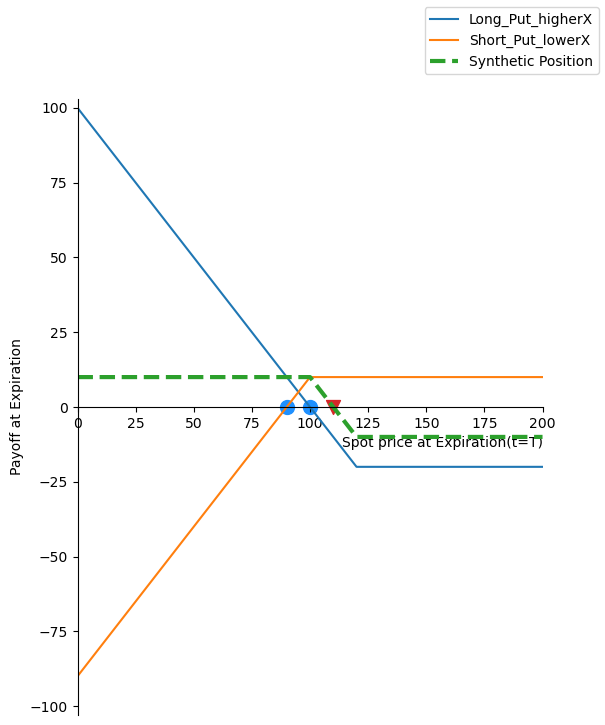

In [17]:
# option premium paid for Long Put
option_premium_1 = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = 120

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium_1)
payoff_df['Long_Put_higherX'] = Long_Put_payoff

# option premium received for Short Put
option_premium_2 = 10
X = 100

Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium_2)
payoff_df['Short_Put_lowerX'] = Short_Put_payoff

selected_positions = ['Long_Put_higherX', 'Short_Put_lowerX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Straddle

### Long Straddle: C + P

Long_Call BEP: S = 120
Long_Put BEP: S = 80
Synthetic Position BEP: S = [60, 140]


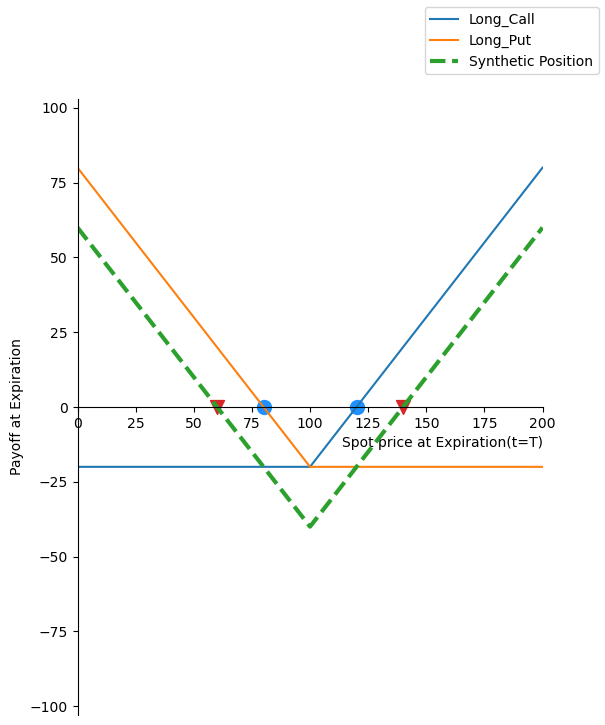

In [18]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call'] = Long_Call_payoff

Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put'] = Long_Put_payoff

selected_positions = ['Long_Call', 'Long_Put']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Straddle: -C -P

Short_Call BEP: S = 120
Short_Put BEP: S = 80
Synthetic Position BEP: S = [60, 140]


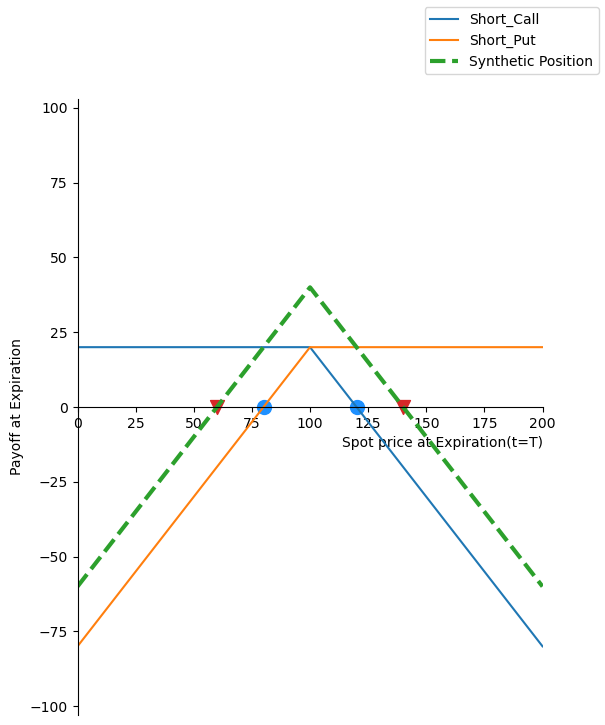

In [19]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call'] = Short_Call_payoff

Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put'] = Short_Put_payoff

selected_positions = ['Short_Call', 'Short_Put']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Strangle

### Long Strangle: C + P (X_C > X_P)

Long_Call_higherX BEP: S = 140
Long_Put_lowerX BEP: S = 80
Synthetic Position BEP: S = [60, 160]


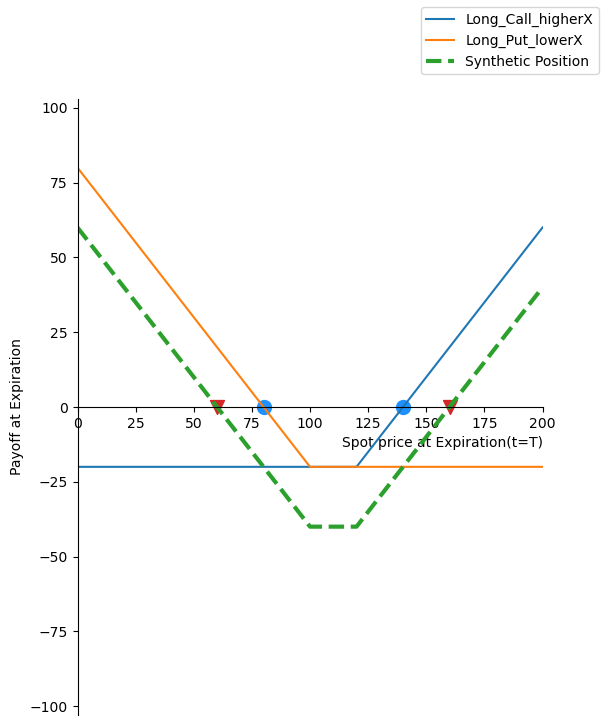

In [20]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = 120

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_higherX'] = Long_Call_payoff


X = 100

Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_lowerX'] = Long_Put_payoff

selected_positions = ['Long_Call_higherX', 'Long_Put_lowerX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Strangle: -C -P (X_C > X_P)

Short_Call_higherX BEP: S = 140
Short_Put_lowerX BEP: S = 80
Synthetic Position BEP: S = [60, 160]


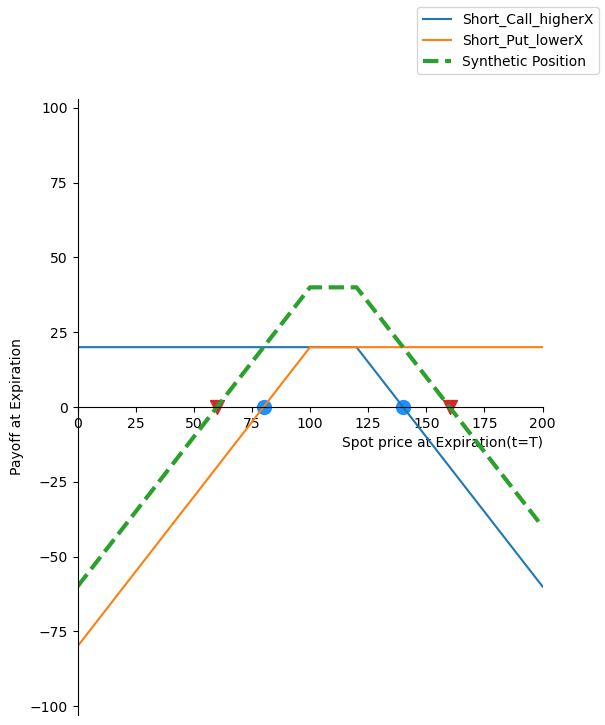

In [21]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = 120

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_higherX'] = Short_Call_payoff

X = 100

Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_lowerX'] = Short_Put_payoff

selected_positions = ['Short_Call_higherX', 'Short_Put_lowerX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Collar

### Long Collar: S -C + P (X_C > X_P)

Long_Stock BEP: S = 100
Short_Call_higherX BEP: S = 140
Long_Put_lowerX BEP: S = 60
Synthetic Position BEP: S = 100


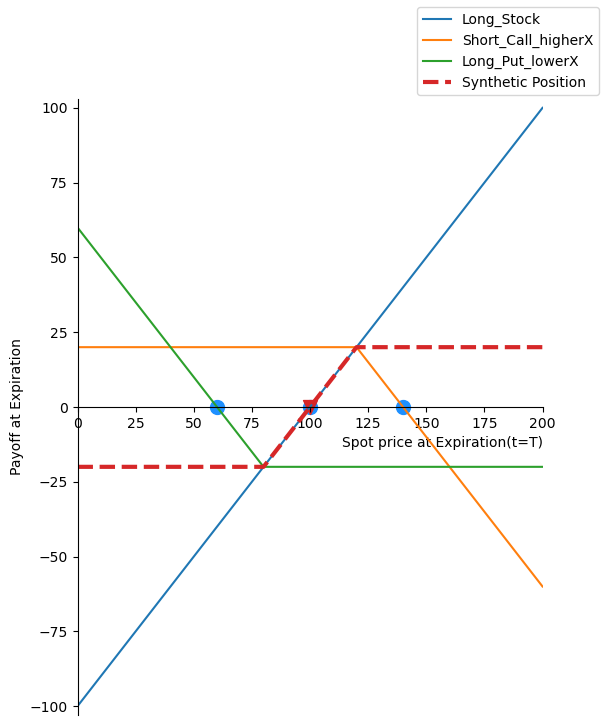

In [22]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price, N)
payoff_df['Long_Stock'] = Long_Stock_payoff

# Excercise Price
X = 120

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_higherX'] = Short_Call_payoff

X = 80

Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_lowerX'] = Long_Put_payoff

selected_positions = ['Long_Stock', 'Short_Call_higherX', 'Long_Put_lowerX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Collar: -S -P + C (X_C > X_P)

Short_Stock BEP: S = 100
Short_Put_lowerX BEP: S = 60
Long_Call_higherX BEP: S = 140
Synthetic Position BEP: S = 100


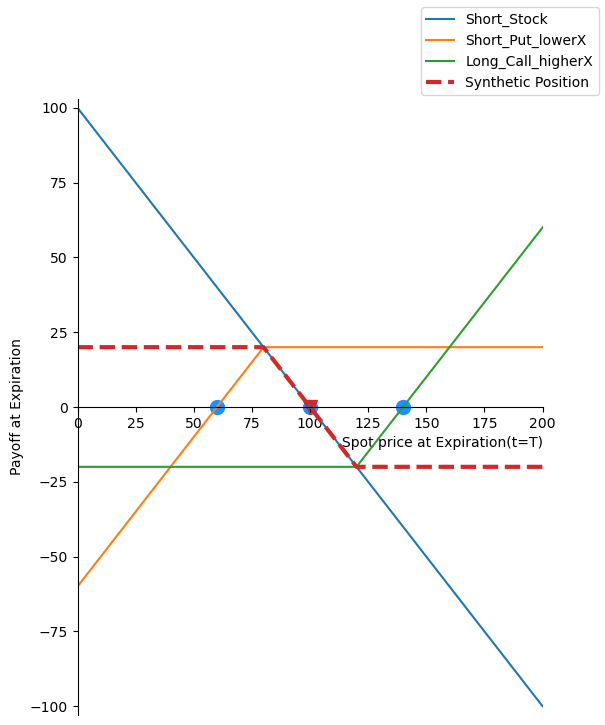

In [23]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

Short_Stock_payoff, Short_Stock_BEP = op.Short_Stock(S, buy_price, N)
payoff_df['Short_Stock'] = Short_Stock_payoff

# Excercise Price
X = 80

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_lowerX'] = Short_Put_payoff

X = 120

Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_higherX'] = Long_Call_payoff

selected_positions = ['Short_Stock', 'Short_Put_lowerX', 'Long_Call_higherX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Butterfly

### Long Butterfly: C1 -2*C2 + C3 (X_C1 < X_C2 < X_C3) & (X_C2 - X_C1 = X_C3 - X_C2 equidistant strike prices)

Long_Call_lowestX BEP: S = 100
Short_Call_midX_1 BEP: S = 110
Short_Call_midX_2 BEP: S = 110
Long_Call_higherX BEP: S = 130
Synthetic Position BEP: S = [90, 110]


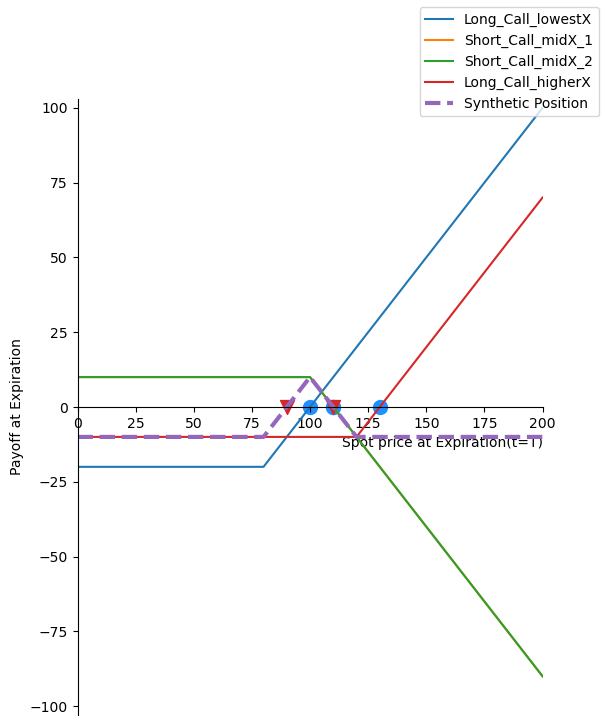

In [24]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)

# Excercise Price
mid_X = 100
# equidistance
d = 20

X = mid_X - d
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_lowestX'] = Long_Call_payoff

option_premium = 10
X = mid_X
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_midX_1'] = Short_Call_payoff

X = mid_X
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_midX_2'] = Short_Call_payoff

option_premium = 10
X = mid_X + d
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_higherX'] = Long_Call_payoff

selected_positions = ['Long_Call_lowestX', 'Short_Call_midX_1', 'Short_Call_midX_2', 'Long_Call_higherX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Long Put Butterfly: P1 -2*P2 + P3 (X_P1 < X_P2 < X_P3) & (X_P2 - X_P1 = X_P3 - X_P2 equidistant strike prices)

Long_Put_lowestX BEP: S = 60
Short_Put_midX_1 BEP: S = 90
Short_Put_midX_2 BEP: S = 90
Long_Put_higherX BEP: S = 110
Synthetic Position BEP: S = [90, 110]


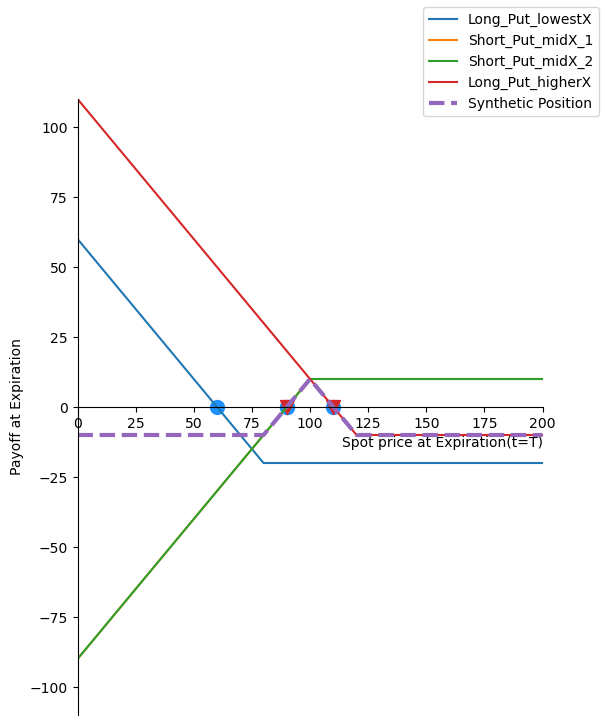

In [25]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)

# Excercise Price
mid_X = 100
# equidistance
d = 20

X = mid_X - d
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_lowestX'] = Long_Put_payoff

option_premium = 10
X = mid_X
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_midX_1'] = Short_Put_payoff

X = mid_X
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_midX_2'] = Short_Put_payoff

option_premium = 10
X = mid_X + d
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_higherX'] = Long_Put_payoff

selected_positions = ['Long_Put_lowestX', 'Short_Put_midX_1', 'Short_Put_midX_2', 'Long_Put_higherX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Call Butterfly: -C1 + 2*C2 -C3 (X_C1 < X_C2 < X_C3) & (X_C2 - X_C1 = X_C3 - X_C2 equidistant strike prices)

Short_Call_lowestX BEP: S = 100
Long_Call_midX_1 BEP: S = 110
Long_Call_midX_2 BEP: S = 110
Short_Call_highestX BEP: S = 130
Synthetic Position BEP: S = [90, 110]


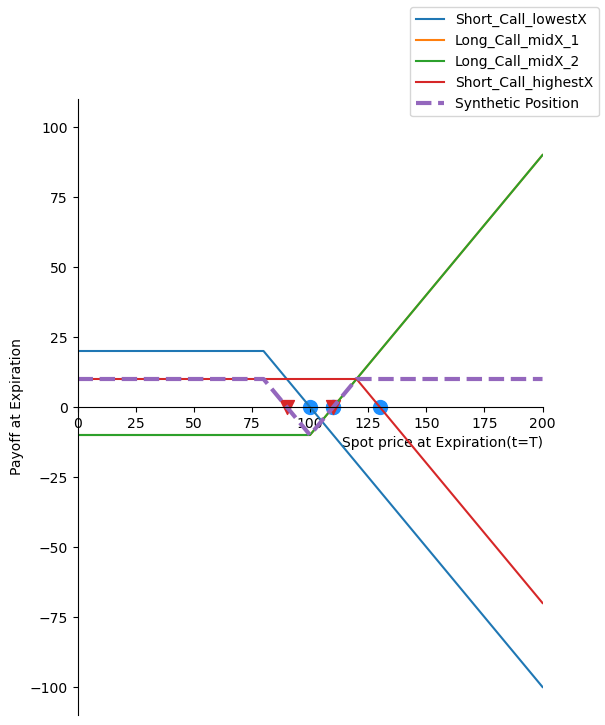

In [26]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)

# Excercise Price
mid_X = 100
# equidistance
d = 20

X = mid_X - d
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_lowestX'] = Short_Call_payoff

option_premium = 10
X = mid_X
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_midX_1'] = Long_Call_payoff

X = mid_X
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_midX_2'] = Long_Call_payoff

option_premium = 10
X = mid_X + d
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_highestX'] = Short_Call_payoff

selected_positions = ['Short_Call_lowestX', 'Long_Call_midX_1', 'Long_Call_midX_2', 'Short_Call_highestX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Put Butterfly: -P1 + 2*P2 -P3 (X_P1 < X_P2 < X_P3) & (X_P2 - X_P1 = X_P3 - X_P2 equidistant strike prices)

Short_Put_lowestX BEP: S = 60
Long_Put_midX_1 BEP: S = 90
Long_Put_midX_2 BEP: S = 90
Short_Put_highestX BEP: S = 110
Synthetic Position BEP: S = [90, 110]


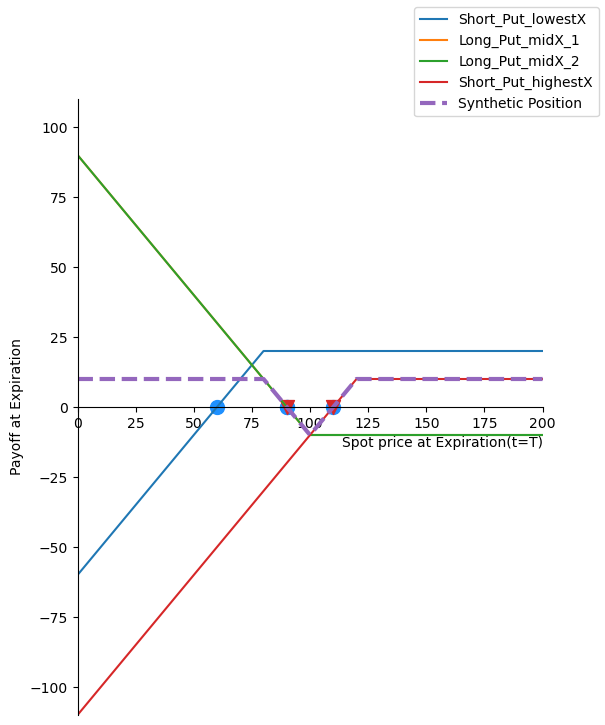

In [27]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)

# Excercise Price
mid_X = 100
# equidistance
d = 20

X = mid_X - d
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_lowestX'] = Short_Put_payoff

option_premium = 10
X = mid_X
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_midX_1'] = Long_Put_payoff

X = mid_X
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_midX_2'] = Long_Put_payoff

option_premium = 10
X = mid_X + d
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_highestX'] = Short_Put_payoff

selected_positions = ['Short_Put_lowestX', 'Long_Put_midX_1', 'Long_Put_midX_2', 'Short_Put_highestX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Condor

### Long Call Condor: C1 - C2 - C3 + C4 (X_C1 < X_C2 < X_C3 < X_C4)  & (X_C2 - X_C1 = X_C4 - X_C3 equidistant strike prices)

Long_Call_1 BEP: S = 100
Short_Call_2 BEP: S = 110
Short_Call_3 BEP: S = 150
Long_Call_4 BEP: S = 170
Synthetic Position BEP: S = [90, 150]


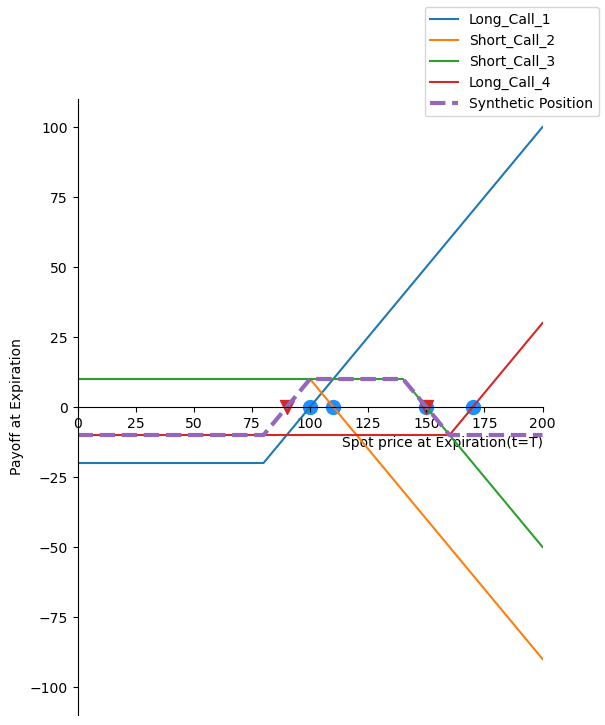

In [28]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
# equidistance
d = 20
# Excercise Price
mid_X_2 = 100
mid_X_3 = mid_X_2 + 2*d

X = mid_X_2 - d
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_1'] = Long_Call_payoff

option_premium = 10
X = mid_X_2
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_2'] = Short_Call_payoff

########

X = mid_X_3
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_3'] = Short_Call_payoff

option_premium = 10
X = mid_X_3 + d
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_4'] = Long_Call_payoff

selected_positions = ['Long_Call_1', 'Short_Call_2', 'Short_Call_3', 'Long_Call_4']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Long Put Condor: P1 - P2 - P3 + P4 (X_P1 < X_P2 < X_P3 < X_P4)  & (X_P2 - X_P1 = X_P4 - X_P3 equidistant strike prices)

Long_Put_1 BEP: S = 60
Short_Put_2 BEP: S = 90
Short_Put_3 BEP: S = 130
Long_Put_4 BEP: S = 150
Synthetic Position BEP: S = [90, 150]


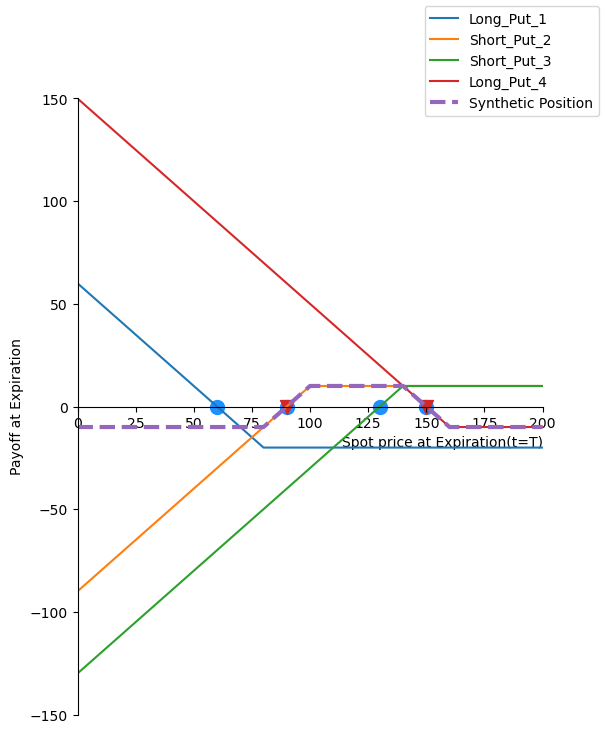

In [29]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
# equidistance
d = 20
# Excercise Price
mid_X_2 = 100
mid_X_3 = mid_X_2 + 2*d

X = mid_X_2 - d
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_1'] = Long_Put_payoff

option_premium = 10
X = mid_X_2
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_2'] = Short_Put_payoff

########

X = mid_X_3
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_3'] = Short_Put_payoff

option_premium = 10
X = mid_X_3 + d
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_4'] = Long_Put_payoff

selected_positions = ['Long_Put_1', 'Short_Put_2', 'Short_Put_3', 'Long_Put_4']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Call Condor: -C1 + C2 + C3 -C4 (X_C1 < X_C2 < X_C3 < X_C4)  & (X_C2 - X_C1 = X_C4 - X_C3 equidistant strike prices)

Short_Call_1 BEP: S = 100
Long_Call_2 BEP: S = 110
Long_Call_3 BEP: S = 150
Short_Call_4 BEP: S = 170
Synthetic Position BEP: S = [90, 150]


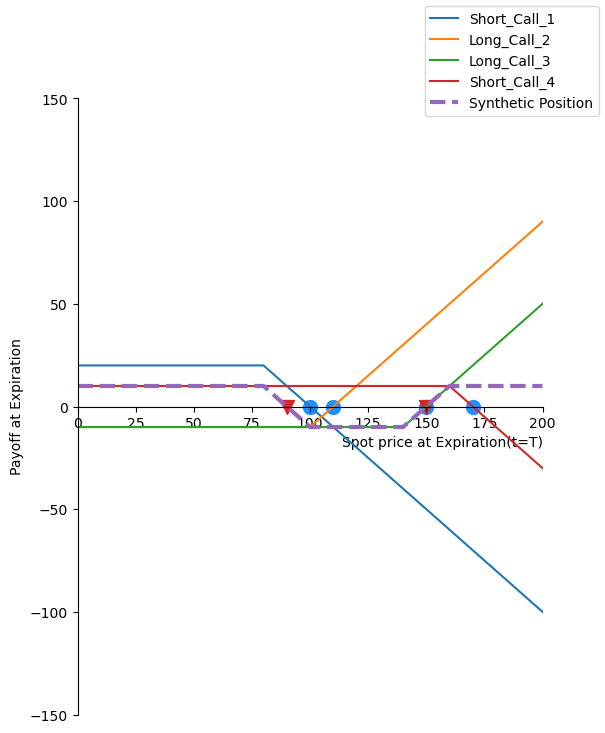

In [30]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
# equidistance
d = 20
# Excercise Price
mid_X_2 = 100
mid_X_3 = mid_X_2 + 2*d

X = mid_X_2 - d
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_1'] = Short_Call_payoff

option_premium = 10
X = mid_X_2
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_2'] = Long_Call_payoff

########

X = mid_X_3
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_3'] = Long_Call_payoff

option_premium = 10
X = mid_X_3 + d
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_4'] = Short_Call_payoff

selected_positions = ['Short_Call_1', 'Long_Call_2', 'Long_Call_3', 'Short_Call_4']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Put Condor: -P1 + P2 + P3 -P4 (X_P1 < X_P2 < X_P3 < X_P4)  & (X_P2 - X_P1 = X_P4 - X_P3 equidistant strike prices)

Short_Put_1 BEP: S = 60
Long_Put_2 BEP: S = 90
Long_Put_3 BEP: S = 130
Short_Put_4 BEP: S = 150
Synthetic Position BEP: S = [90, 150]


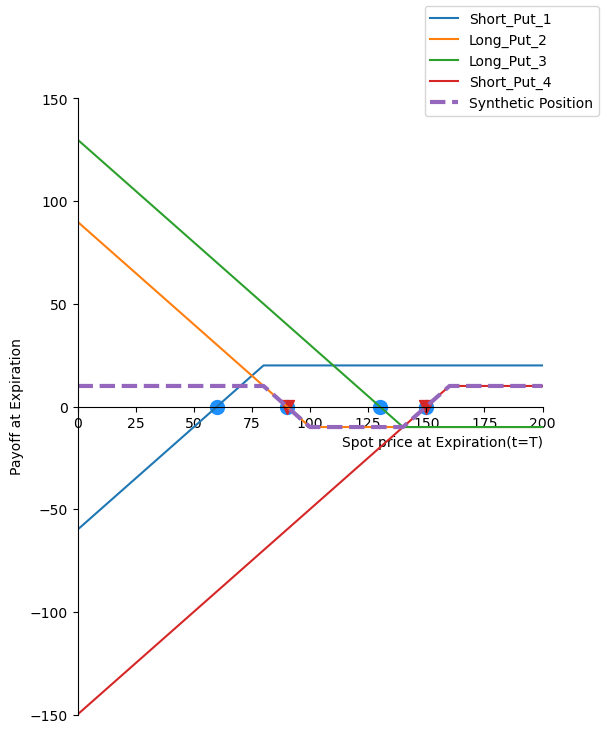

In [31]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
# equidistance
d = 20
# Excercise Price
mid_X_2 = 100
mid_X_3 = mid_X_2 + 2*d

X = mid_X_2 - d
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_1'] = Short_Put_payoff

option_premium = 10
X = mid_X_2
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_2'] = Long_Put_payoff

########

X = mid_X_3
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_3'] = Long_Put_payoff

option_premium = 10
X = mid_X_3 + d
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_4'] = Short_Put_payoff

selected_positions = ['Short_Put_1', 'Long_Put_2', 'Long_Put_3', 'Short_Put_4']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Iron Butterfly

### Long Iron Butterfly: -P1 + P2 + C1 -C2 (X_P1 < X_P2 = X_C1 < X_C2)  & (X_P2 - X_P1 = X_C2 - X_C1 equidistant strike prices)

Short_Put_1 BEP: S = 60
Long_Put_2 BEP: S = 80
Long_Call_1 BEP: S = 120
Short_Call_2 BEP: S = 130
Synthetic Position BEP: S = [90, 110]


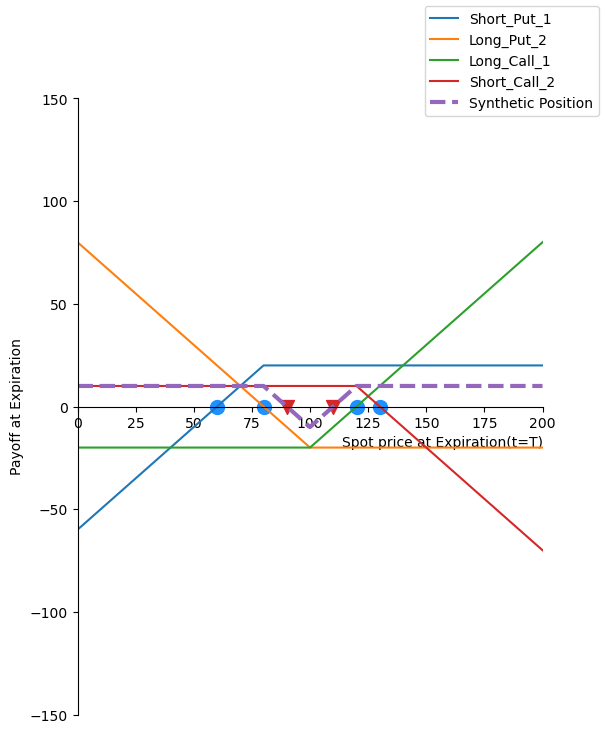

In [32]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
# equidistance
d = 20
# Excercise Price
mid_X_2 = 100
mid_X_3 = mid_X_2

X = mid_X_2 - d
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_1'] = Short_Put_payoff

option_premium = 20
X = mid_X_2
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_2'] = Long_Put_payoff

########

X = mid_X_3
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_1'] = Long_Call_payoff

option_premium = 10
X = mid_X_3 + d
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_2'] = Short_Call_payoff

selected_positions = ['Short_Put_1', 'Long_Put_2', 'Long_Call_1', 'Short_Call_2']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Iron Butterfly: P1 -P2 -C1 + C2 (X_P1 < X_P2 = X_C1 < X_C2)  & (X_P2 - X_P1 = X_C2 - X_C1 equidistant strike prices)

Long_Put_1 BEP: S = 60
Short_Put_2 BEP: S = 80
Short_Call_1 BEP: S = 120
Long_Call_2 BEP: S = 130
Synthetic Position BEP: S = [90, 110]


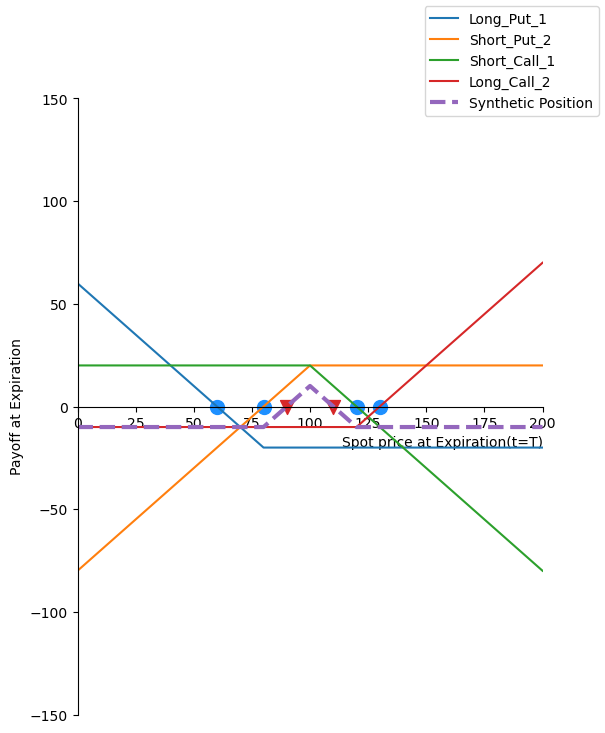

In [33]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
# equidistance
d = 20
# Excercise Price
mid_X_2 = 100
mid_X_3 = mid_X_2

X = mid_X_2 - d
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_1'] = Long_Put_payoff

option_premium = 20
X = mid_X_2
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_2'] = Short_Put_payoff

########

X = mid_X_3
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_1'] = Short_Call_payoff

option_premium = 10
X = mid_X_3 + d
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_2'] = Long_Call_payoff

selected_positions = ['Long_Put_1', 'Short_Put_2', 'Short_Call_1', 'Long_Call_2']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Iron Condor

### Long Iron Condor: -P1 + P2 + C1 -C2 (X_P1 < X_P2 < X_C1 < X_C2)  & (X_P2 - X_P1 = X_C2 - X_C1 equidistant strike prices)

Short_Put_1 BEP: S = 70
Long_Put_2 BEP: S = 90
Long_Call_1 BEP: S = 160
Short_Call_2 BEP: S = 170
Synthetic Position BEP: S = [90, 150]


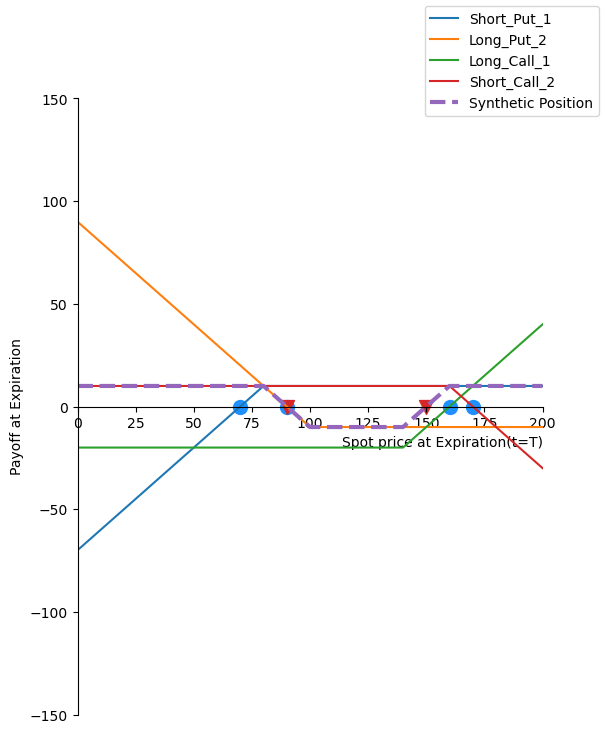

In [34]:
# option premium
option_premium = 10

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)

# equidistance
d = 20
# Excercise Price
mid_X_2 = 100
mid_X_3 = mid_X_2 + 2*d


X = mid_X_2 - d
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_1'] = Short_Put_payoff

option_premium = 10
X = mid_X_2
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_2'] = Long_Put_payoff

########

option_premium = 20
X = mid_X_3
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_1'] = Long_Call_payoff

option_premium = 10
X = mid_X_3 + d
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_2'] = Short_Call_payoff

selected_positions = ['Short_Put_1', 'Long_Put_2', 'Long_Call_1', 'Short_Call_2']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Iron Condor: P1 -P2 -C1 + C2 (X_P1 < X_P2 < X_C1 < X_C2)  & (X_P2 - X_P1 = X_C2 - X_C1 equidistant strike prices)

Long_Put_1 BEP: S = 70
Short_Put_2 BEP: S = 90
Short_Call_1 BEP: S = 160
Long_Call_2 BEP: S = 170
Synthetic Position BEP: S = [90, 150]


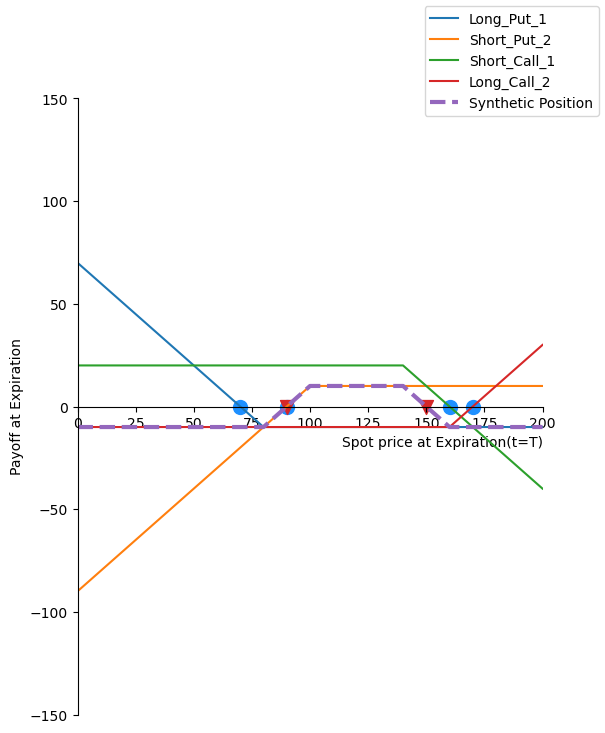

In [35]:
# option premium
option_premium = 10

# Underlying buyprice
buy_price = 100

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)

# equidistance
d = 20
# Excercise Price
mid_X_2 = 100
mid_X_3 = mid_X_2 + 2*d


X = mid_X_2 - d
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put_1'] = Long_Put_payoff

option_premium = 10
X = mid_X_2
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put_2'] = Short_Put_payoff

########

option_premium = 20
X = mid_X_3
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call_1'] = Short_Call_payoff

option_premium = 10
X = mid_X_3 + d
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call_2'] = Long_Call_payoff

selected_positions = ['Long_Put_1', 'Short_Put_2', 'Short_Call_1', 'Long_Call_2']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Calendar Spread

### Long Call Calendar Spread: -C_ST + C_LT

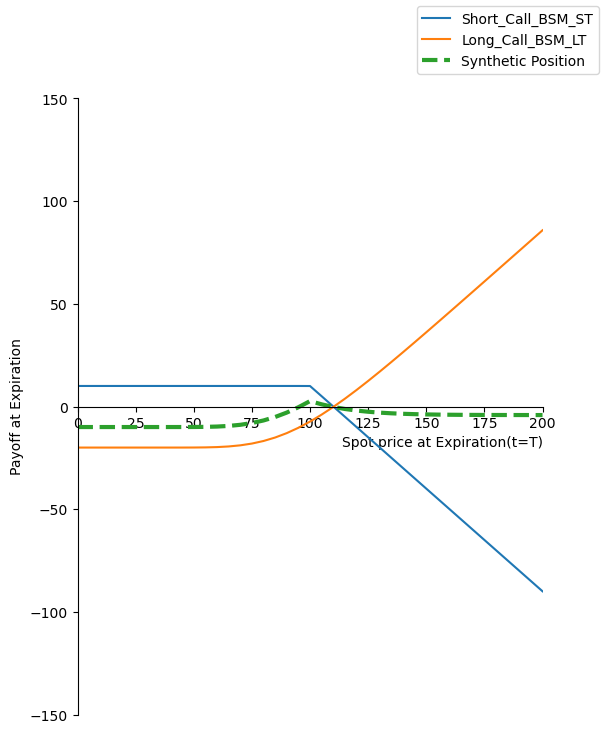

In [36]:
### BSM Inputs
X=100
# Risk-free rate
r = 0.04
# Volatility
stdev = 0.2


option_premium = 10
N = 1

# (T - t), remaining time to expiration in years
T = 0.00001
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Short_Call_BSM_ST'] = (BSM_Call_payoff * (-1) + option_premium) * N


option_premium = 20
T = 1.5
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Call_BSM_LT'] = (BSM_Call_payoff - option_premium) * N

selected_positions = ['Short_Call_BSM_ST', 'Long_Call_BSM_LT']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Long Put Calendar Spread: -P_ST + P_LT

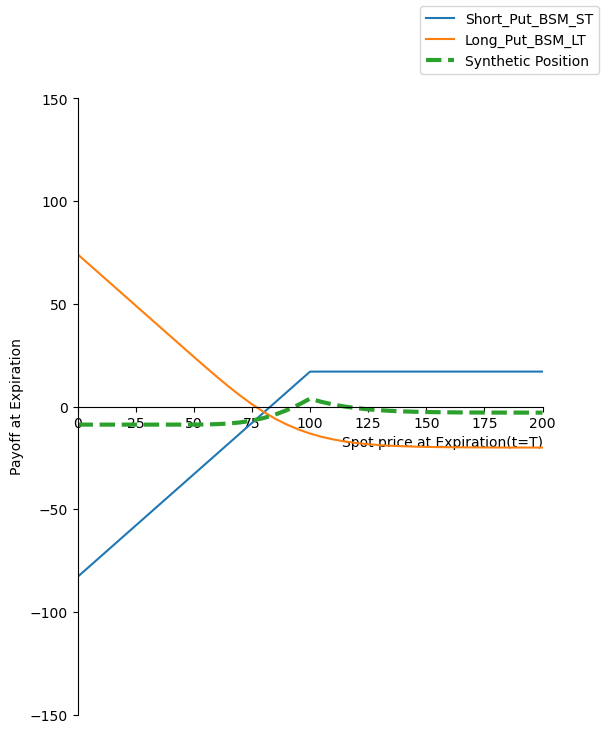

In [37]:
### BSM Inputs
X=100
# Risk-free rate
r = 0.04
# Volatility
stdev = 0.2


option_premium = 17
N = 1

# (T - t), remaining time to expiration in years
T = 0.00001
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Short_Put_BSM_ST'] = (BSM_Put_payoff * (-1) + option_premium) * N


option_premium = 20
T = 1.5
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Put_BSM_LT'] = (BSM_Put_payoff - option_premium) * N

selected_positions = ['Short_Put_BSM_ST', 'Long_Put_BSM_LT']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Call Calendar Spread: C_ST -C_LT

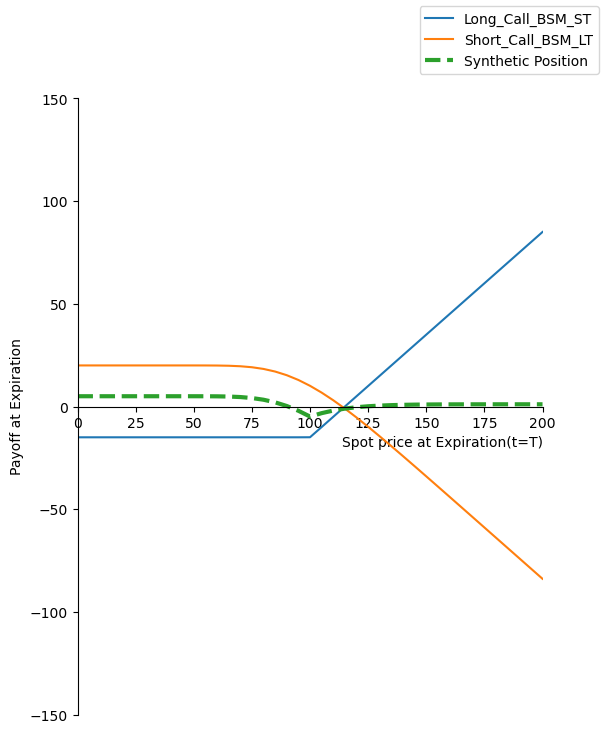

In [38]:
### BSM Inputs
X=100
# Risk-free rate
r = 0.04
# Volatility
stdev = 0.2


option_premium = 15
N = 1

# (T - t), remaining time to expiration in years
T = 0.00001
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Call_BSM_ST'] = (BSM_Call_payoff - option_premium) * N


option_premium = 20
T = 1
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Short_Call_BSM_LT'] = (BSM_Call_payoff * (-1) + option_premium) * N

selected_positions = ['Long_Call_BSM_ST', 'Short_Call_BSM_LT']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Put Calendar Spread: P_ST -P_LT

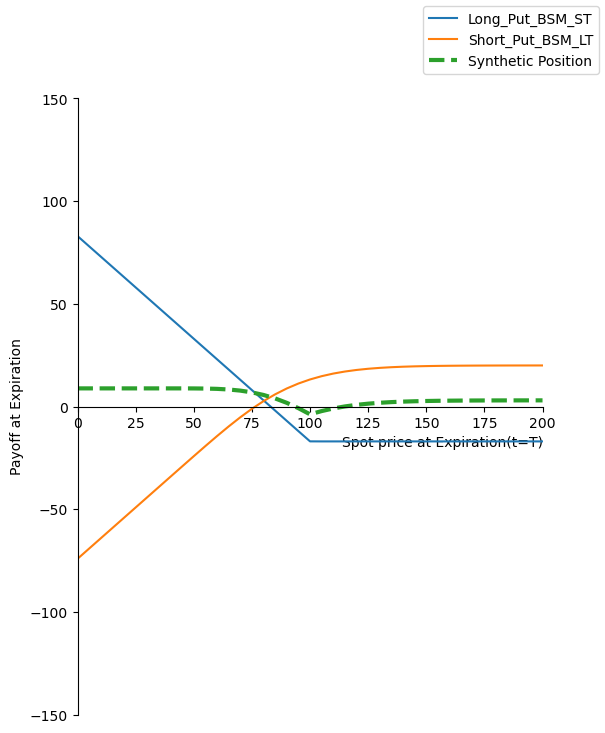

In [39]:
### BSM Inputs
X=100
# Risk-free rate
r = 0.04
# Volatility
stdev = 0.2


option_premium = 17
N = 1

# (T - t), remaining time to expiration in years
T = 0.00001
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Put_BSM_ST'] = (BSM_Put_payoff - option_premium) * N


option_premium = 20
T = 1.5
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Short_Put_BSM_LT'] = (BSM_Put_payoff * (-1) + option_premium) * N

selected_positions = ['Long_Put_BSM_ST', 'Short_Put_BSM_LT']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Diagonal Spread

### Long Diagonal Bull Call Spread: C_LT -C_ST (X_C_LT < X_C_ST) & (T_ST < T_LT)

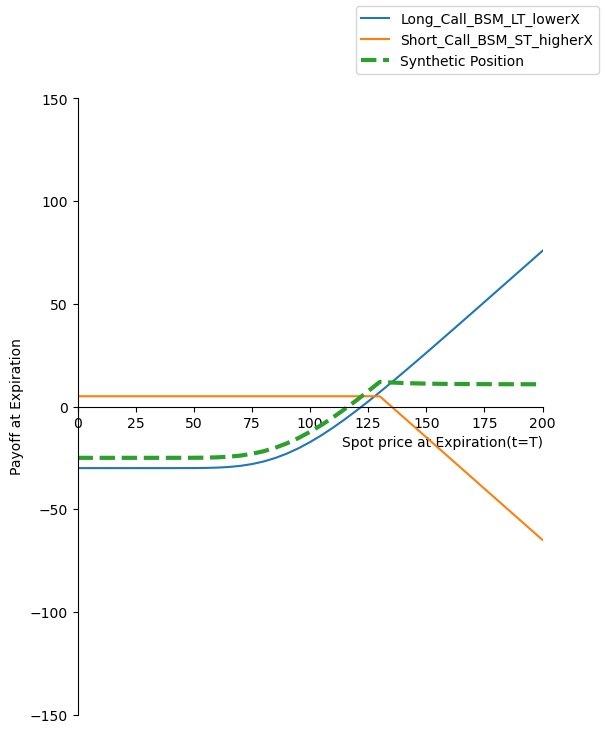

In [40]:
# Probably, Much more expensive C_LT(ATM) > C_ST (OTM)

### BSM Inputs

# Risk-free rate
r = 0.04
# Volatility
stdev = 0.2
N = 1

# LT
X=100
option_premium = 30
# (T - t), remaining time to expiration in years
T = 1.5
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Call_BSM_LT_lowerX'] = (BSM_Call_payoff - option_premium) * N

# ST
X=130
option_premium = 5
T = 0.00001
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Short_Call_BSM_ST_higherX'] = (BSM_Call_payoff *(-1) + option_premium) * N

selected_positions = ['Long_Call_BSM_LT_lowerX', 'Short_Call_BSM_ST_higherX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Diagonal Bear Call Spread: -C_LT +C_ST (X_C_LT < X_C_ST) & (T_ST < T_LT)

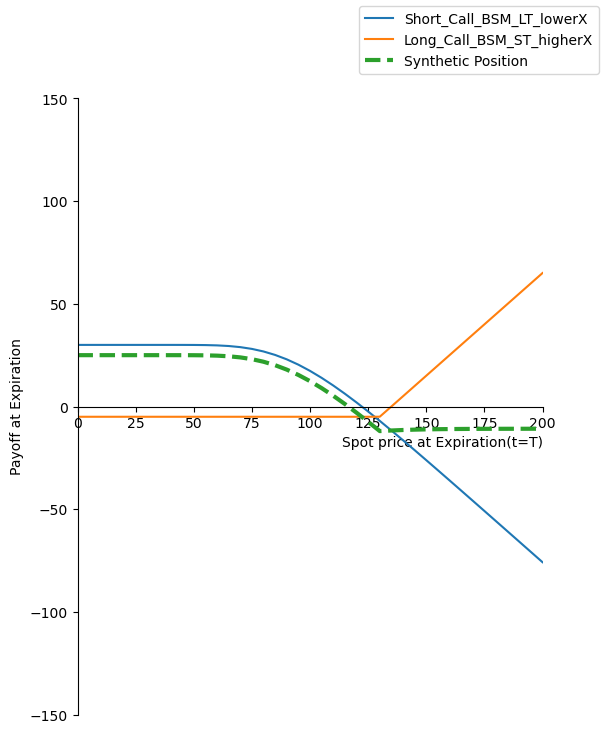

In [41]:
### BSM Inputs

# Risk-free rate
r = 0.04
# Volatility
stdev = 0.2
N = 1

# LT
X=100
option_premium = 30
# (T - t), remaining time to expiration in years
T = 1.5
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Short_Call_BSM_LT_lowerX'] = (BSM_Call_payoff *(-1) + option_premium) * N

# ST
X=130
option_premium = 5
T = 0.00001
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Call_BSM_ST_higherX'] = (BSM_Call_payoff - option_premium) * N

selected_positions = ['Short_Call_BSM_LT_lowerX', 'Long_Call_BSM_ST_higherX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Long Diagonal Bear Put Spread: P_LT -P_ST (X_P_LT > X_P_ST) & (T_ST < T_LT)

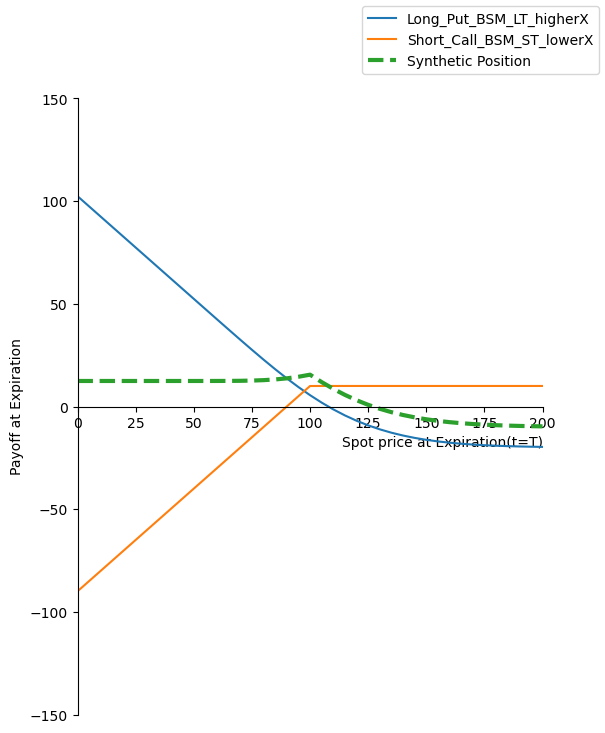

In [42]:
# Probably, Much more expensive C_LT(ATM) > C_ST (OTM)

### BSM Inputs

# Risk-free rate
r = 0.04
# Volatility
stdev = 0.2
N = 1

# LT
X=130
option_premium = 20
# (T - t), remaining time to expiration in years
T = 1.5
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Put_BSM_LT_higherX'] = (BSM_Put_payoff - option_premium) * N

# ST
X=100
option_premium = 10
T = 0.00001
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Short_Call_BSM_ST_lowerX'] = (BSM_Put_payoff *(-1) + option_premium) * N

selected_positions = ['Long_Put_BSM_LT_higherX', 'Short_Call_BSM_ST_lowerX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

### Short Diagonal Bull Put Spread: -P_LT + P_ST (X_P_LT > X_P_ST) & (T_ST < T_LT)

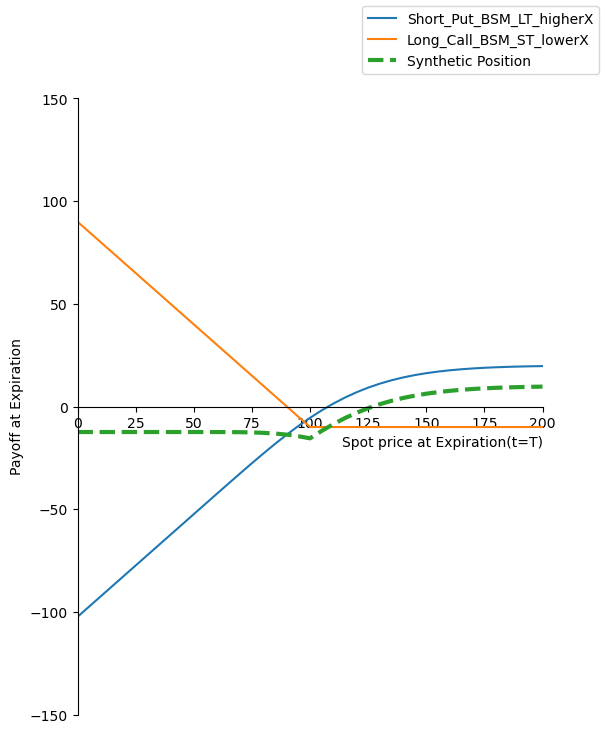

In [43]:
# Probably, Much more expensive C_LT(ATM) > C_ST (OTM)

### BSM Inputs

# Risk-free rate
r = 0.04
# Volatility
stdev = 0.2
N = 1

# LT
X=130
option_premium = 20
# (T - t), remaining time to expiration in years
T = 1.5
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Short_Put_BSM_LT_higherX'] = (BSM_Put_payoff *(-1) + option_premium) * N

# ST
X=100
option_premium = 10
T = 0.00001
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Call_BSM_ST_lowerX'] = (BSM_Put_payoff - option_premium) * N

selected_positions = ['Short_Put_BSM_LT_higherX', 'Long_Call_BSM_ST_lowerX']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)